In [1]:
import numpy as np

import matplotlib 
%matplotlib inline
%config InlineBackend.figure_format='retina'
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.rcParams['xtick.labelsize'] = 14.0
matplotlib.rcParams['ytick.labelsize'] = 14.0
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d.axes3d import Axes3D
#from matplotlib.ticker import LogFormatterMathtext


from scipy.stats import ks_2samp, entropy
from scipy.integrate import simpson as simps



# Statistical properties of data

Given a dataset it is useful to compute its statistical properties, as most physical measurements only are describable (and/or interesting) as part of a larger ensamble of data in an analysis.
The underlying phsyics will determine what the expected form of the statistical properties are, but given a large number of datapoints most will tend towards a Gaussian distribution(see [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)).

In a bivariate case

$$p(x,y) \propto \exp{ \left( -\frac{1}{2} (\mathbf{x}-\mathbf{\mu})^T \Sigma^{-1} (\mathbf{x}-\mathbf{\mu}) \right) }$$

where $\mathbf{x} \equiv \begin{pmatrix}x\\y\end{pmatrix}$ are the positions of the datapoints, their means are described by $\mathbf{\mu} \equiv \begin{pmatrix}\mu_x\\\mu_y\end{pmatrix}$ and their covariance matrix is $\Sigma \equiv \begin{pmatrix}\sigma_x^2 & \rho\sigma_x\sigma_y\\\rho\sigma_x\sigma_y & \sigma_y^2\end{pmatrix}$. The [correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between the two dimensions is defined as $\rho \equiv \frac{\sigma_x\sigma_y}{\sqrt{\sigma_x^2\sigma_y^2}}$.


In [2]:
def print_stats(dataset):
    
    print('Mean of x-values ', "%.2f" % dataset[0].mean())
    print('Mean of y-values ', "%.2f" % dataset[1].mean())
    print('Standard deviation of x-values ', "%.2f" % dataset[0].std())
    print('Standard deviation of y-values ', "%.2f" % dataset[1].std())
    print('Correlation between x and y ', "%.2f" % np.corrcoef\
    (dataset[0], dataset[1])[0][1])


Load some data from file

In [3]:
d0 = np.genfromtxt('dataset_0.dat')

Plot the datapoints

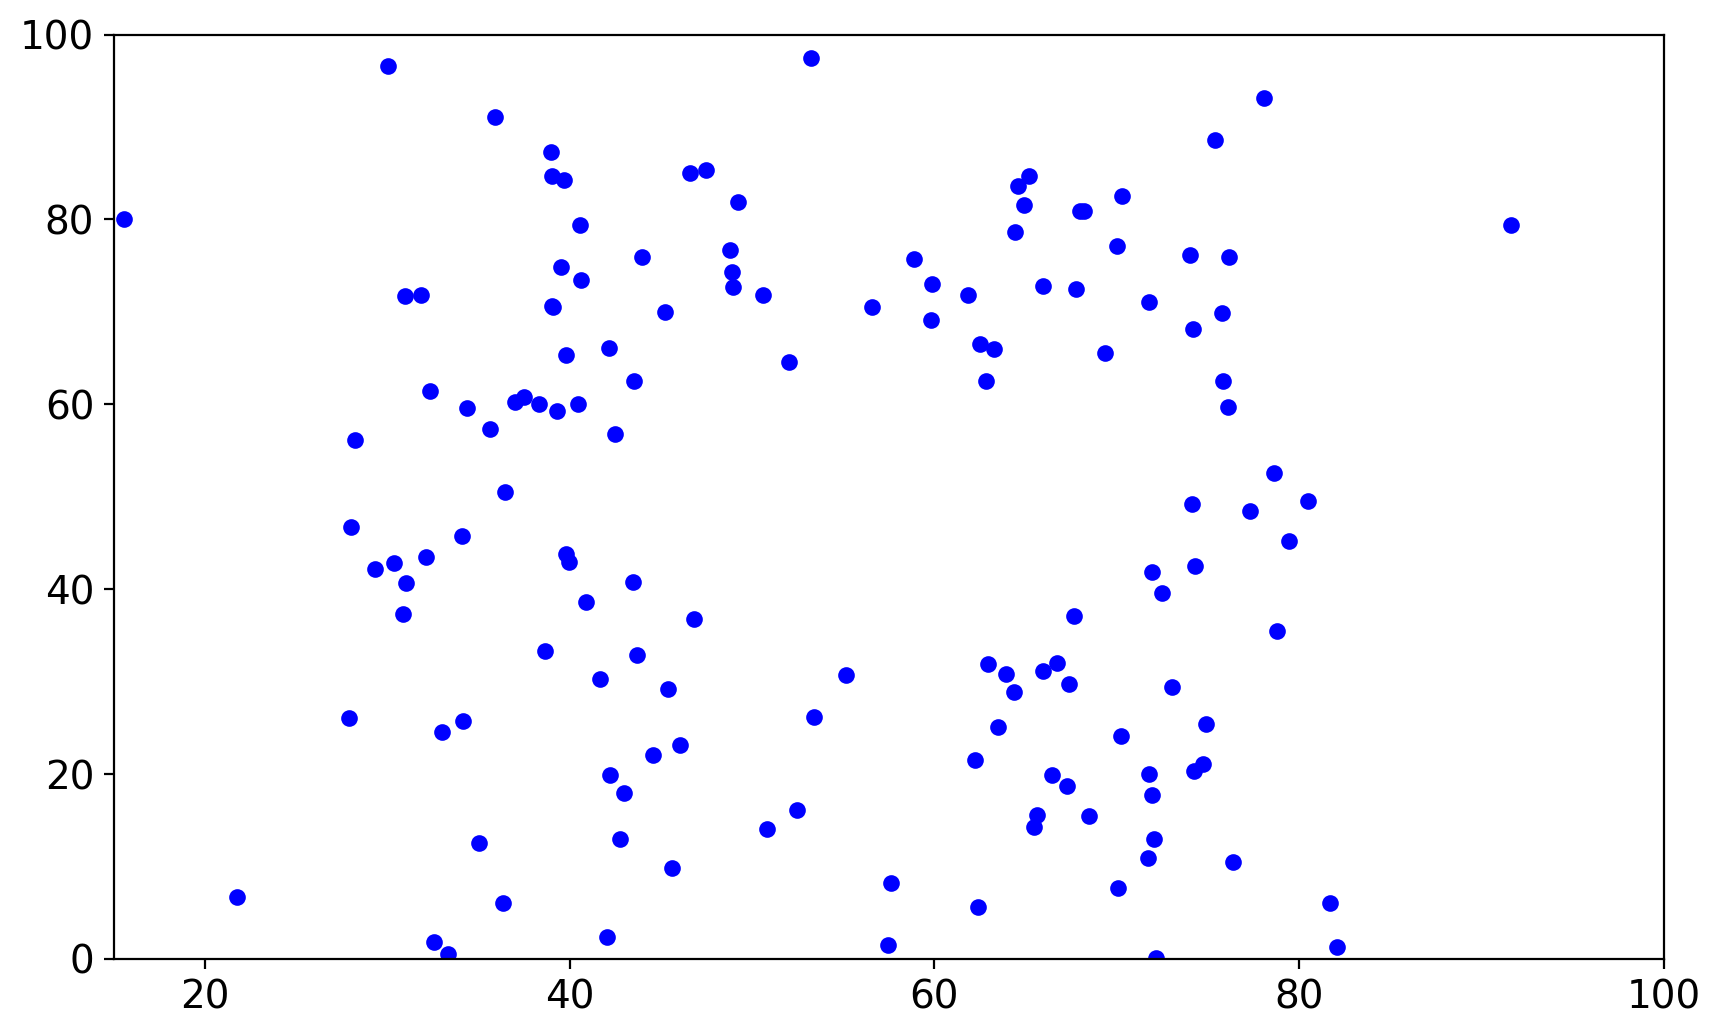

In [4]:
plt.scatter(d0[0], d0[1], lw=0,c='b')
plt.xlim(15,100)
plt.ylim(0,100)
plt.xticks([20,40, 60, 80, 100])
plt.yticks([0, 20,40, 60, 80, 100])
plt.show()

Print its statistical properties

In [5]:
print_stats(d0)

Mean of x-values  54.27
Mean of y-values  47.83
Standard deviation of x-values  16.71
Standard deviation of y-values  26.84
Correlation between x and y  -0.06


Load some more data and print their statistical properties

In [6]:
d1 = np.genfromtxt('dataset_1.dat')
d2 = np.genfromtxt('dataset_2.dat')

print_stats(d1)
print('\n')
print_stats(d2)

Mean of x-values  54.26
Mean of y-values  47.84
Standard deviation of x-values  16.71
Standard deviation of y-values  26.84
Correlation between x and y  -0.06


Mean of x-values  54.26
Mean of y-values  47.83
Standard deviation of x-values  16.71
Standard deviation of y-values  26.84
Correlation between x and y  -0.06


Now you have three datasets that appears to have pretty much the same properties.

In situations like this it's useful to test how similar the datasets really are, or more formally what the probability is that the datapoints in the two sets are drawn from the same statistical distribution.
This can be done using the [KS-test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)



In [7]:
def print_KS_test_prob(data1, data2):
    
    print(ks_2samp(data1, data2)[1])


Numpy only has a 1-dimensional KS-test built in, so we'll have to run it separately for the x- and y-samples

In [8]:
print_KS_test_prob(d0[0], d1[0])
print_KS_test_prob(d0[0], d2[0])
print_KS_test_prob(d1[0], d2[0])
print_KS_test_prob(d0[1], d1[1])
print_KS_test_prob(d0[1], d2[1])
print_KS_test_prob(d1[1], d2[1])

1.2728211442782624e-05
0.08955030137364475
0.0014237880339923463
0.005247466654538557
0.2613561718990633
0.0034474635848989765


Keep in mind that if these points were drawn from the same underlying distributions all these p-values would have been $\sim1$

A simple check to see how similar these 2D-distributions are is to plot them

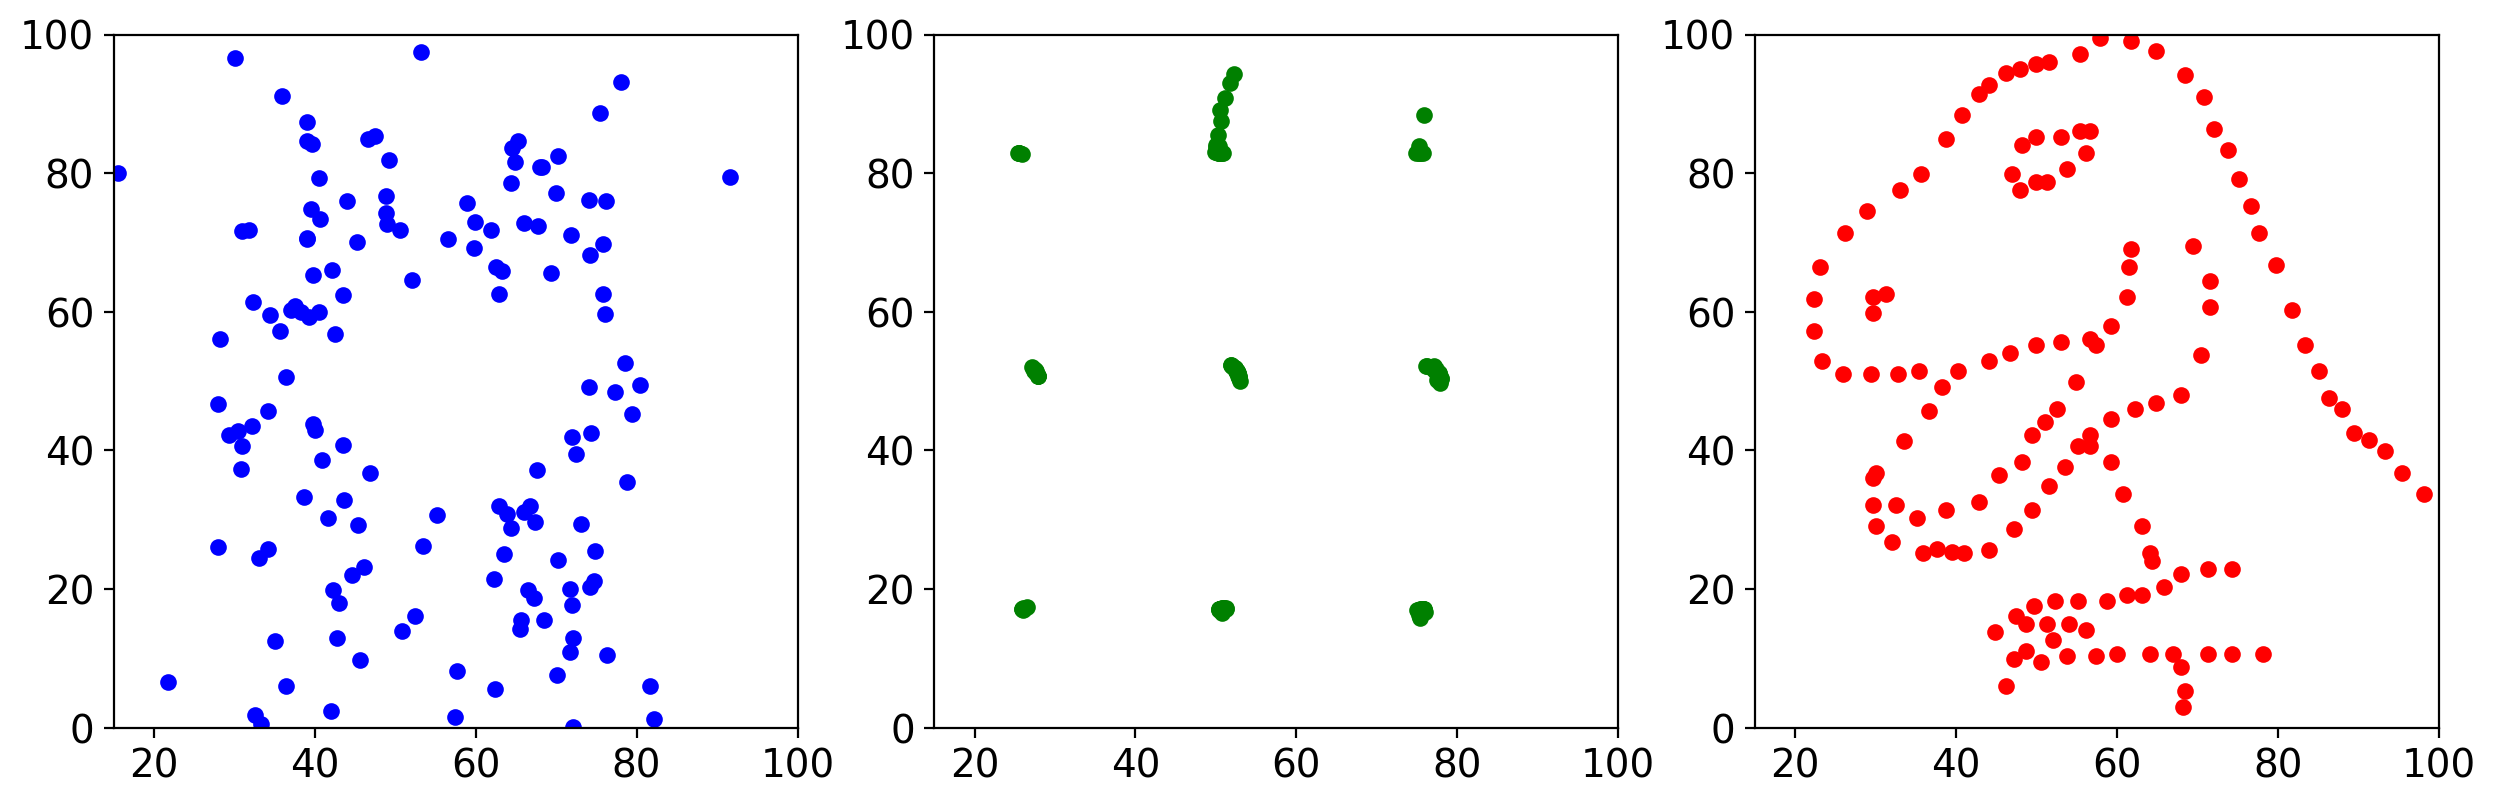

In [9]:
plt.figure(figsize=(15,4.5))

plt.subplot(1, 3, 1)
plt.scatter(d0[0], d0[1], lw=0, c='b')
plt.xlim(15,100)
plt.ylim(0,100)
plt.xticks([20,40, 60, 80, 100])
plt.yticks([0, 20,40, 60, 80, 100])

plt.subplot(1, 3, 2)
plt.scatter(d1[0], d1[1], lw=0, c='g')
plt.xlim(15,100)
plt.ylim(0,100)
plt.xticks([20,40, 60, 80, 100])
plt.yticks([0, 20,40, 60, 80, 100])


plt.subplot(1, 3, 3)
plt.scatter(d2[0], d2[1], lw=0, c='r')
plt.xlim(15,100)
plt.ylim(0,100)
plt.xticks([20,40, 60, 80, 100])
plt.yticks([0, 20,40, 60, 80, 100])

plt.show()

In conlcusion, calculating statistical properties are only really useful as long as you're aware what those properties can (and can't) tell you.

# Estimating parameters from noisy data

Analysing data requires as much awareness about the signal you're trying to find as well as a grasp of whatever can contaminate your data, i.e. noise.

Here a statistical approach, where you can include as much information as you have access to, tends to be the most successful.


## Time for some whiteboard talk!

Bayes' Theorem


$$ p(A|B) = \frac{p(A) p(B|A)}{p(B)} $$

or in "special" notation

$$ p(\theta|d) = \frac{\pi(\theta) L(d|\theta)}{Z(d)} $$

where $p(\theta|d)$ is a posterior probability function which describes the probability of parameters $\theta$ given some data $d$. This posterior depends on a likelihood $L(d|\theta)$ (how likely are the data to be described by a parameter $\theta$), a prior probability $\pi(\theta)$ (are there any constraints on the $\theta$ already) and normalised by the evidence $Z(d)$ (how good is the assumed model at describing the data $d$).

Assume a signal consisting of a one-dimensional Gaussian, so in this case $\theta = \mu$ only

In [12]:
def Gaussian_oneDim(x,m,s, a=1.):
    G = np.exp(-np.square(x-m)/(2*np.square(s)))
    normalisation = simps(G,x=x)
    return a*G/normalisation

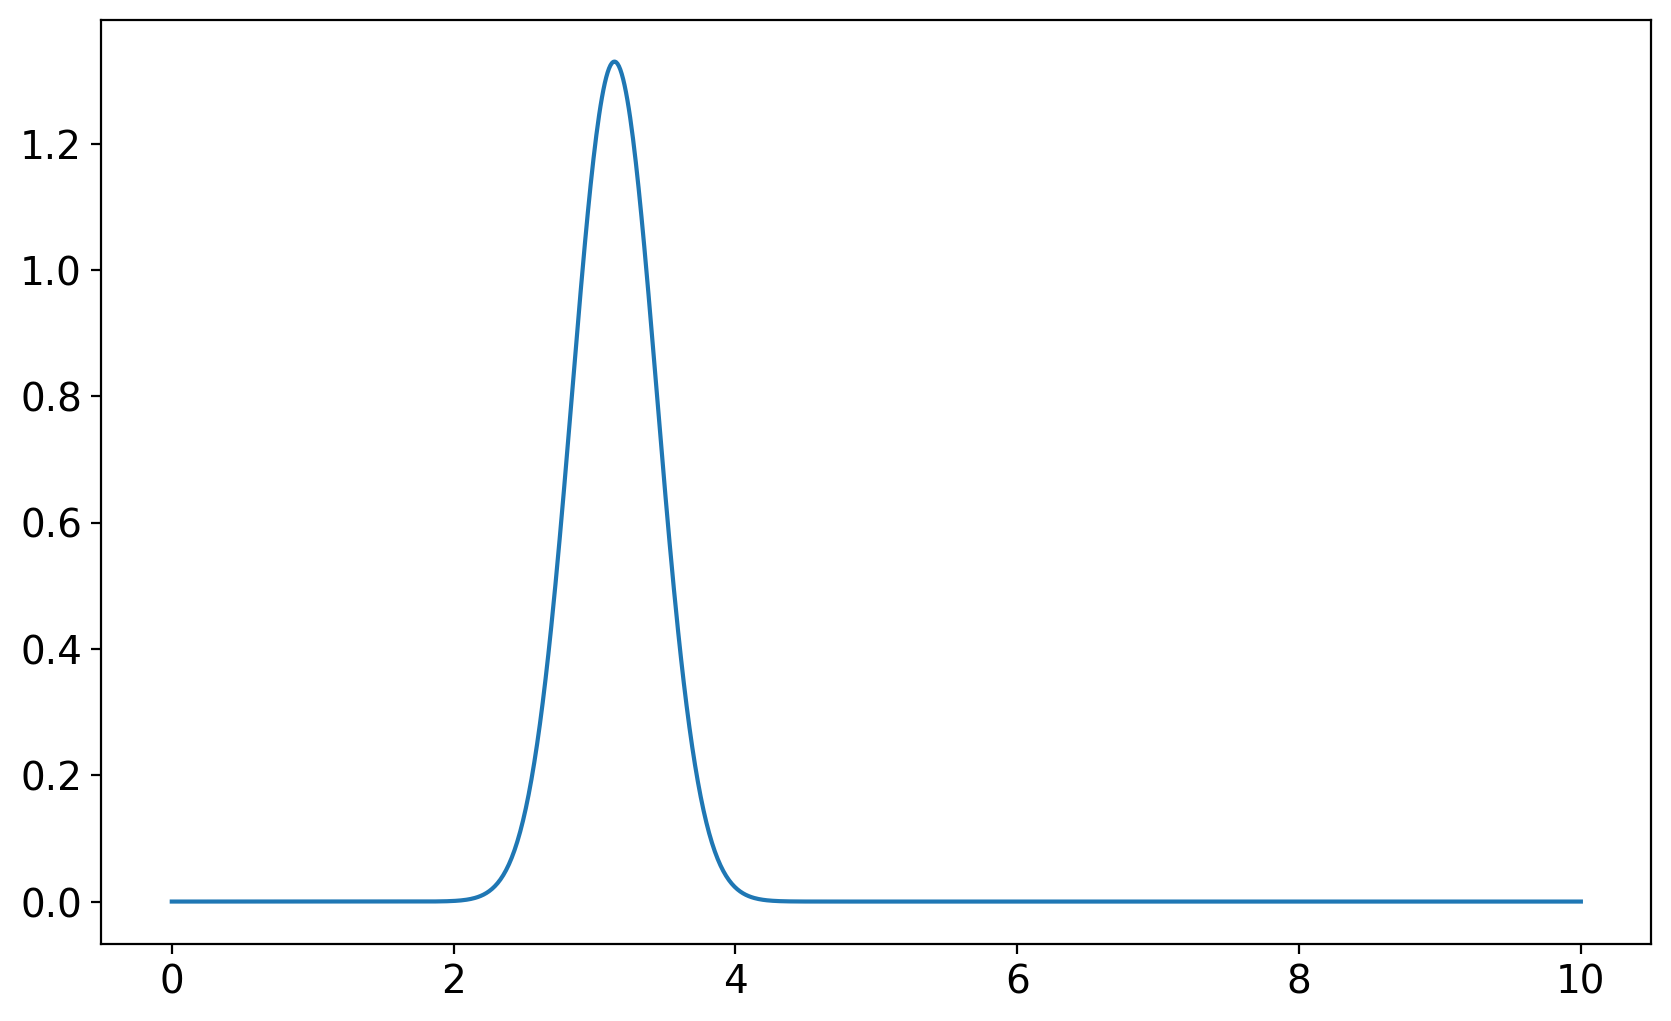

In [13]:
x_val = np.linspace(0,10,1000)

mu_true = np.pi
sigma_true = 0.3
amplitude_true = 1.


signal = Gaussian_oneDim(x_val, mu_true, sigma_true, amplitude_true)

plt.plot(x_val, signal)
plt.show()

This signal will be hidden in noise, where the random process generating the noise can be described by a zero-mean Gaussian process with a known standard deviation.

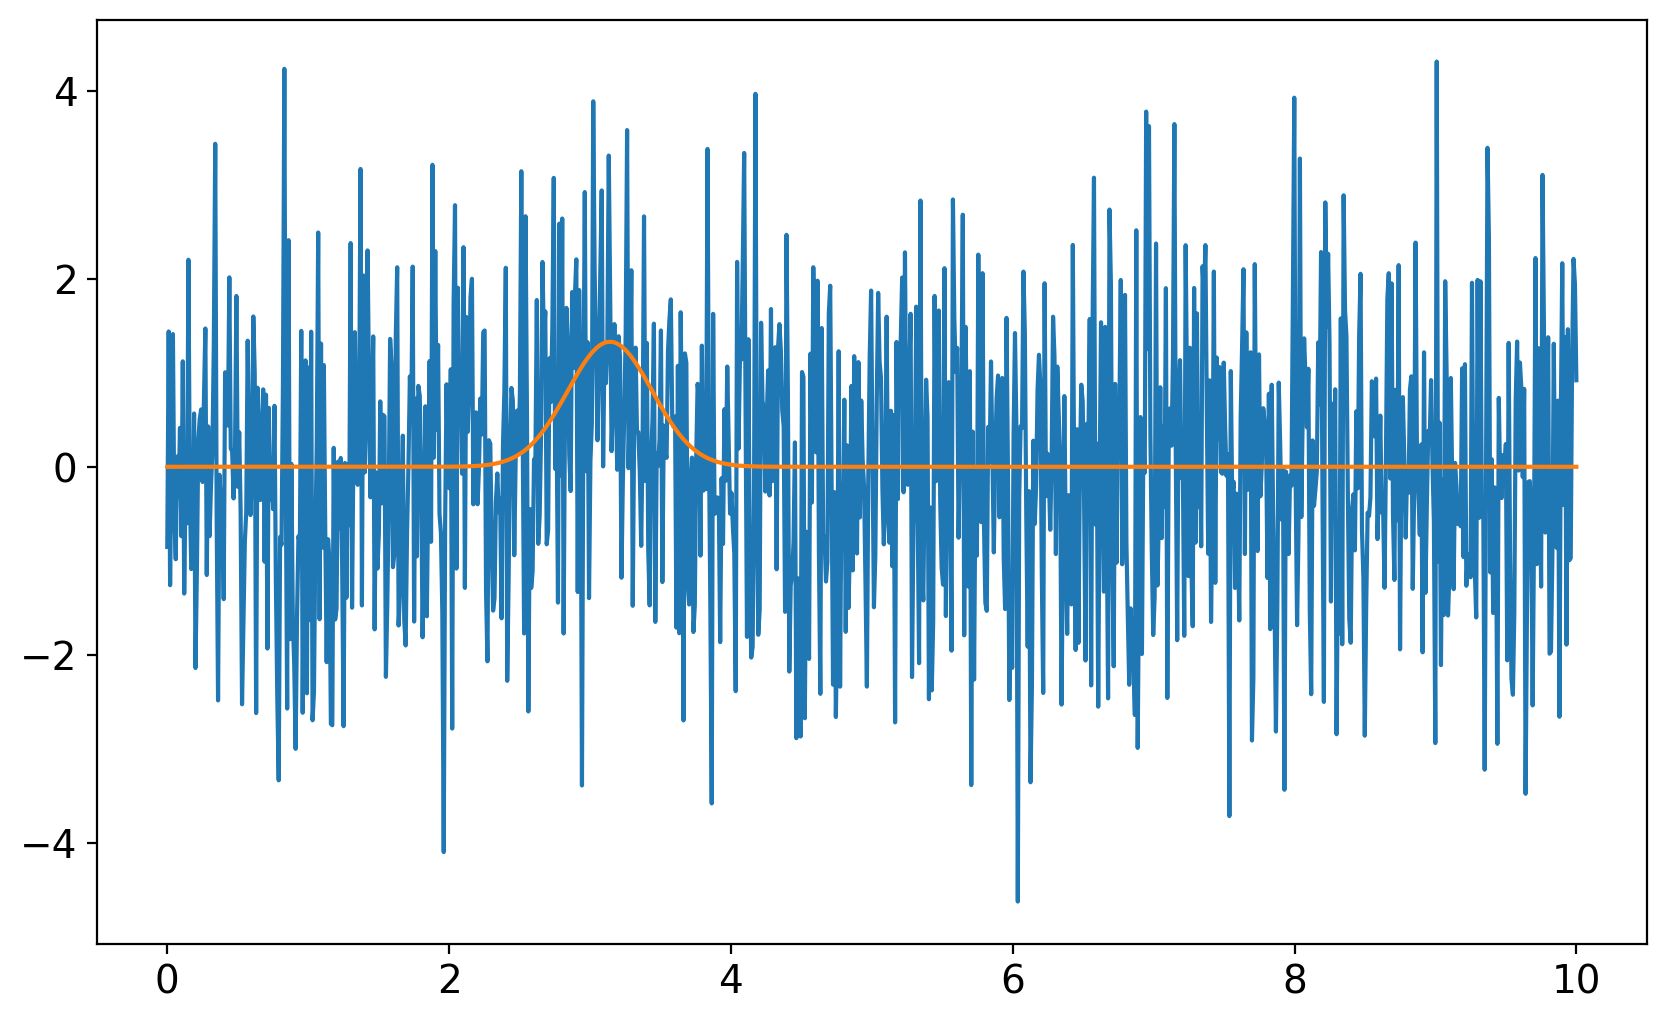

In [14]:
noise_sigma = 1.4

noise = np.random.normal(0, noise_sigma, x_val.size)

data = noise + signal

plt.plot(x_val, data)
plt.plot(x_val, signal)
plt.show()

In principle, the property of this data that is known the best (at the moment) is the standard deviation of the noise

In [15]:
print(data.std(), noise_sigma)

1.4203343800764605 1.4


It is therefore useful to define a likelihood function which tests for how Gaussian the noise is (remember $noise = data - signal$)


It's helpful to work in the logarithm of probabilities (they tend to be easier to keep track of numerically)

$$ \log L(d|\mu) = -\frac{1}{2} \int^{x_{max}}_{x_{min}}\frac{(d(x)-Signal(x,\mu))^2}{\sigma_{noise}^2}dx$$

(compare to [$\chi^2$-test](https://en.wikipedia.org/wiki/Chi-squared_test))

In [18]:
def log_likelihood(data, x_data, mu_test, sigma_test=1., amplitude_test=1., noise_sigma_test=1.):
    
    logL = -0.5*simps(np.square((data - Gaussian_oneDim(x_data,mu_test,sigma_test,amplitude_test))/noise_sigma), x = x_data )

    return logL

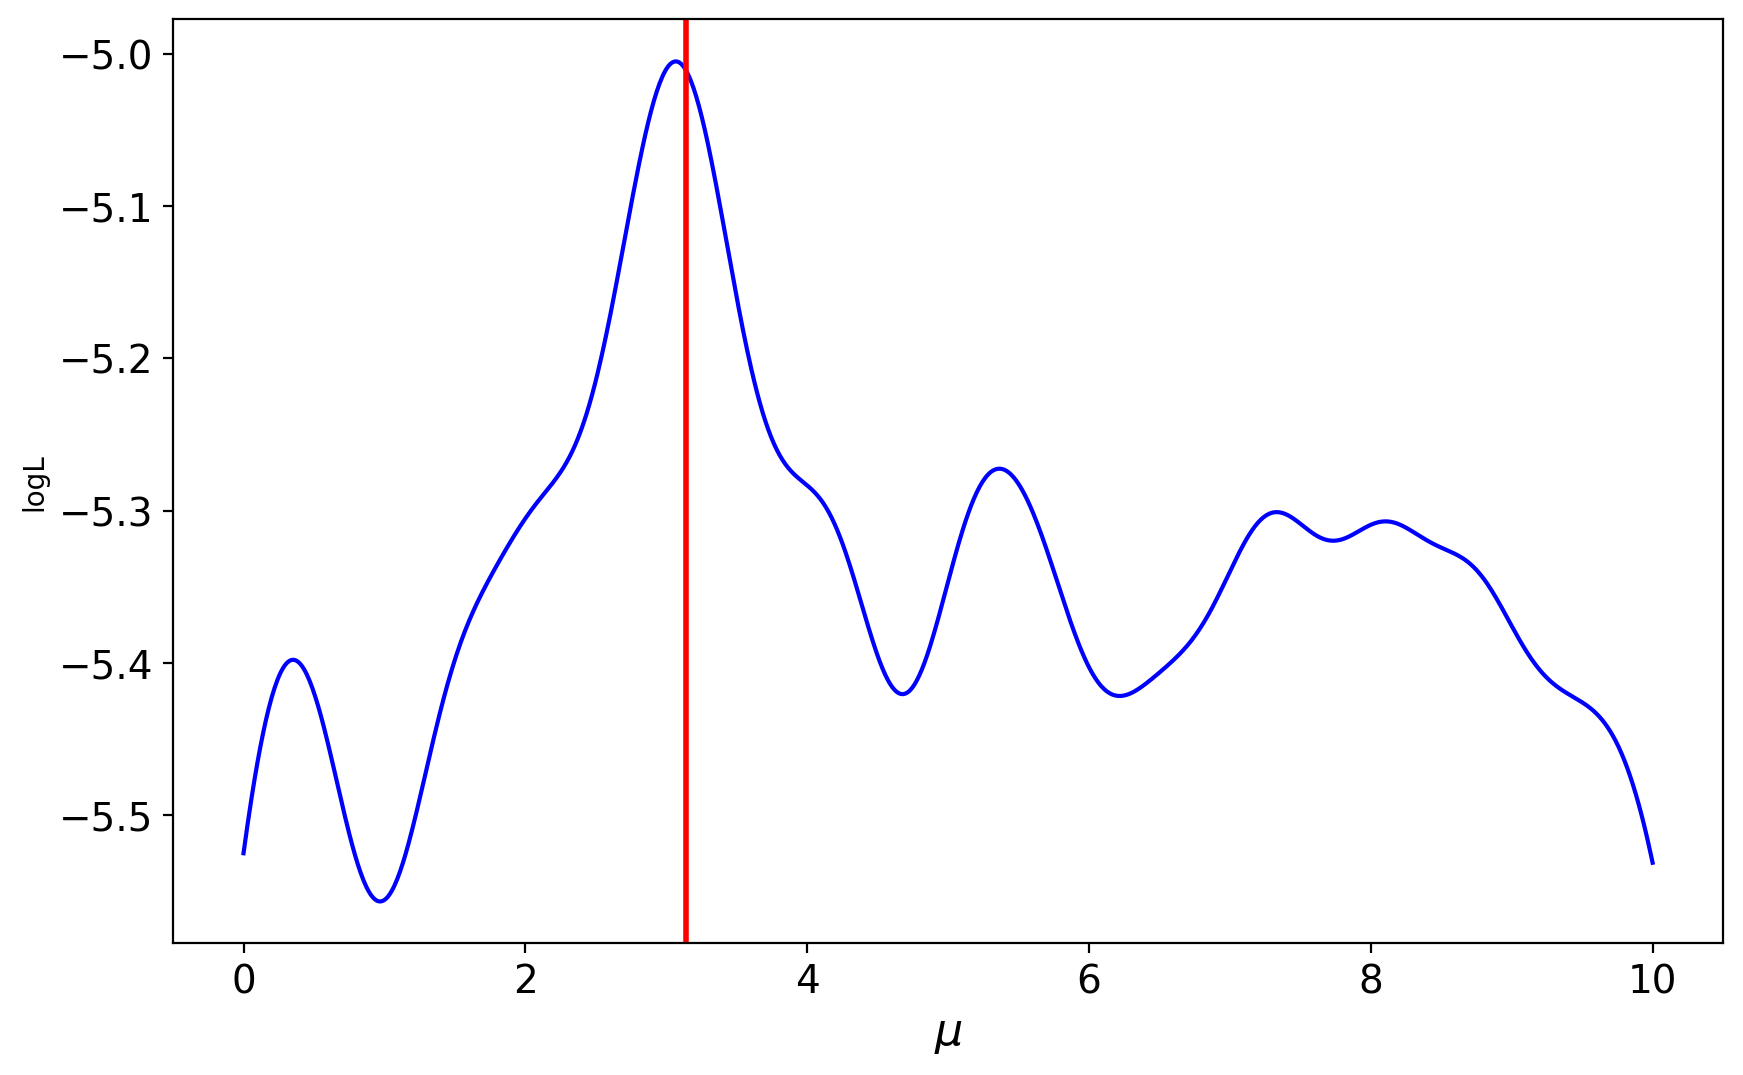

In [19]:
logL = np.zeros_like(x_val)
                          
for i in range(x_val.shape[0]):

    logL[i] = log_likelihood(data, x_val, x_val[i], sigma_test=sigma_true, \
                            amplitude_test=amplitude_true, noise_sigma_test=noise_sigma)

plt.plot(x_val, logL, c='b')
plt.axvline(np.pi, c='r', lw=2)
plt.xlabel(r'$\mu$', fontsize=16)
plt.ylabel('logL')
plt.show()

That's the likelihood of the data containing a signal with a mean $\mu$, but it still doesn't take any prior information into account.

For now, assume that the true $\mu$ lies somewhere inside the range $a < \mu < b$ where each point has equal probability. This gives

$$ \pi(\mu) = \frac{1}{b - a}$$

In [20]:
def log_prior_uniform(input_points, x_min, x_max):
    logprior = np.zeros_like(input_points)
    
    inside_range = np.logical_and(np.greater_equal(input_points, x_min),\
                                  np.less_equal(input_points, x_max))
    
    logprior[inside_range] = -np.log(x_max - x_min)
    
    logprior[np.logical_not(inside_range)] = -np.inf
    
    return logprior

Now the only thing missing from the complete posterior probability distribution is the evidence. Since the posterior is an "actual" probability distribution it needs to integrate to 1.

$$ \int^{\infty}_{-\infty} p(\mu|d) d\mu = 1 $$

which therefore, from rearranging Bayes' Theorem

$$Z(d) p(\mu|d) = \pi(\mu) L(d|\mu)$$ 

and since $Z(d)$ is independent of $\mu$

$$Z(d) \int^{\infty}_{-\infty} p(\mu|d) d\mu = \int^{\infty}_{-\infty}\pi(\mu) L(d|\mu) d\mu$$
$$Z(d) = \int^{\infty}_{-\infty}\pi(\mu) L(d|\mu) d\mu$$

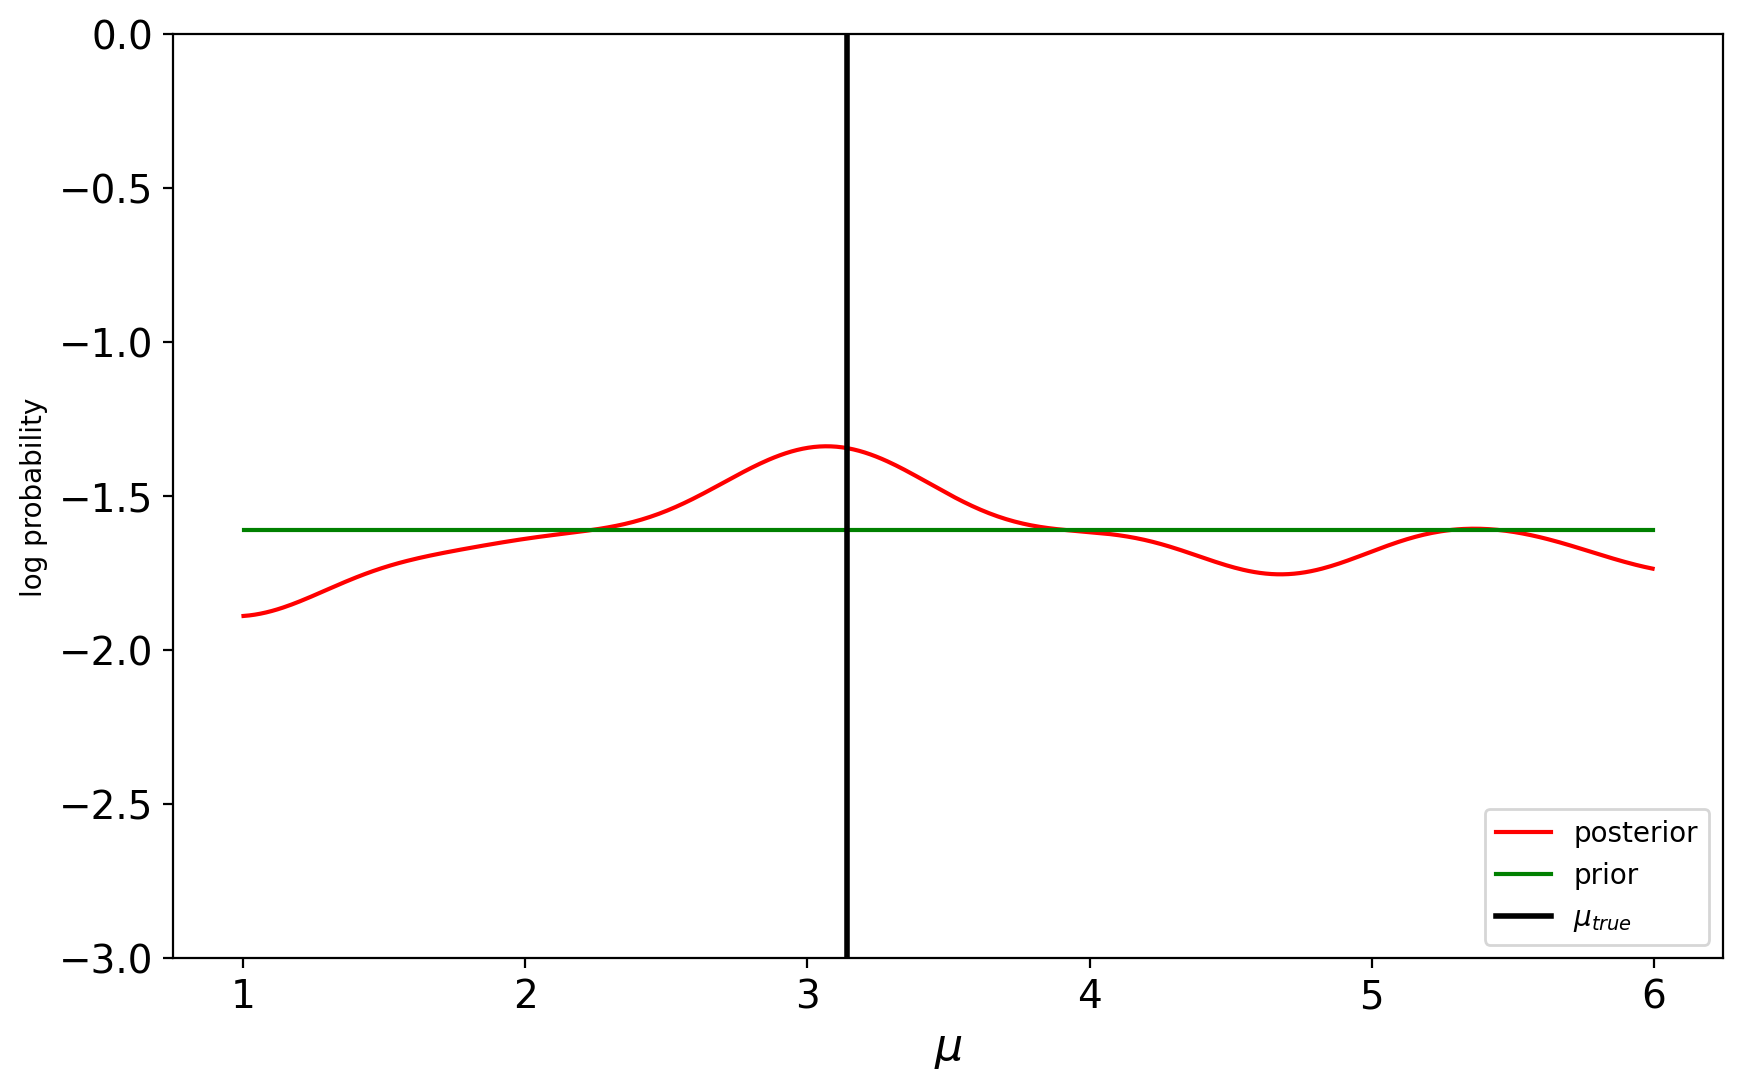

In [22]:
log_prior_1 = log_prior_uniform(x_val, 1., 6.)

log_evidence_1 = np.log(simps(np.exp(log_prior_1 + logL), x = x_val))

log_posterior_1 = log_prior_1 + logL - log_evidence_1

plt.plot(x_val, log_posterior_1, c='r', label='posterior')
plt.plot(x_val, log_prior_1, c='g', label='prior')
plt.axvline(np.pi, c='k', lw=2, label=r'$\mu_{true}$')
plt.legend(loc='lower right')
plt.xlabel(r'$\mu$', fontsize=16)
plt.ylabel('log probability')
plt.ylim(-3,0)
plt.show()

It is also possible to use other choises for the signal model (which comes in either through the likelihood or the prior), and then compare their ability to describe the data using the ratio of their evidences. This is called a [Bayes factor](https://en.wikipedia.org/wiki/Bayes_factor).

As an example, we'll use a Gaussian prior on the signal parameter $\mu$

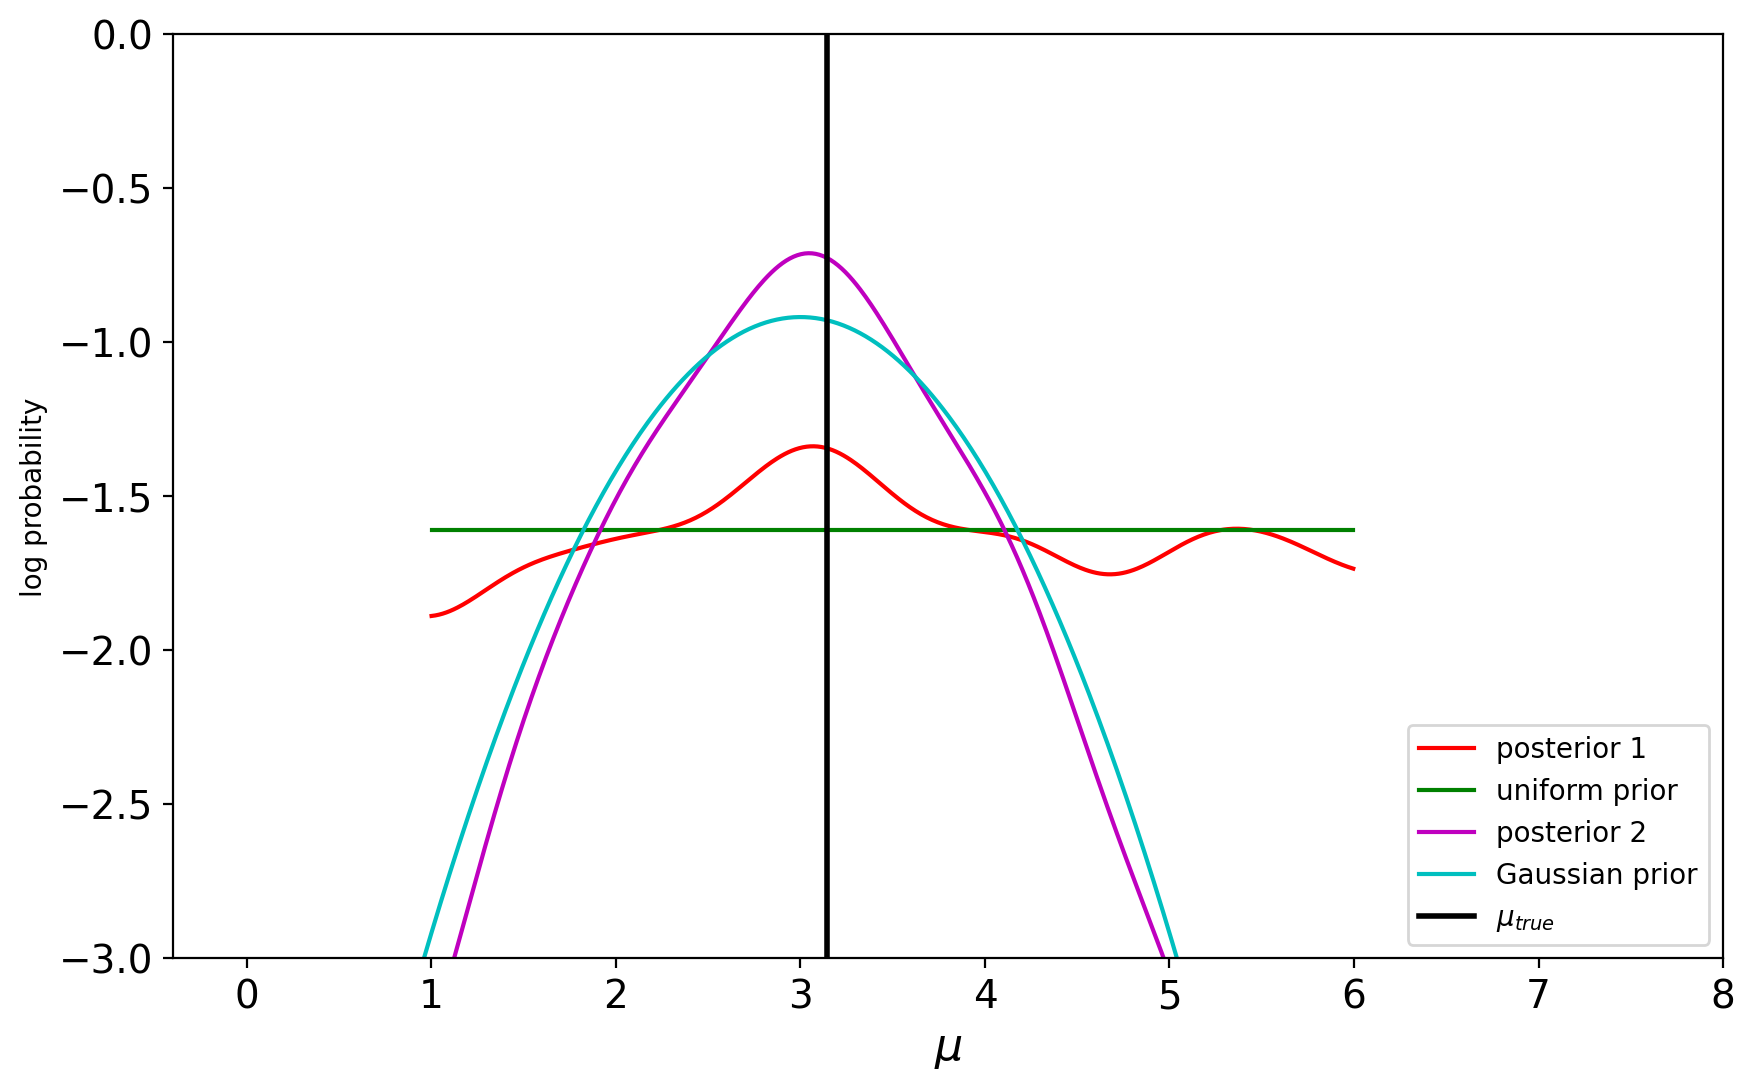

The uniform prior is preferred by a factor 0.9386
The Gaussian prior is preferred by a factor 1.0655
With a uniform prior, the posterior peaks at 3.0631
With a Gaussian prior, the posterior peaks at 3.0430
The truth is  3.1416


In [24]:
log_prior_2 = np.log(Gaussian_oneDim(x_val, 3, 1.))

log_evidence_2 = np.log(simps(np.exp(log_prior_2 + logL), x = x_val))

log_posterior_2 = log_prior_2 + logL - log_evidence_2

plt.plot(x_val, log_posterior_1, c='r', label='posterior 1')
plt.plot(x_val, log_prior_1, c='g', label='uniform prior')
plt.plot(x_val, log_posterior_2, c='m', label='posterior 2')
plt.plot(x_val, log_prior_2, c='c', label='Gaussian prior')
plt.axvline(np.pi, c='k', lw=2, label=r'$\mu_{true}$')
plt.legend(loc='lower right')
plt.xlabel(r'$\mu$', fontsize=16)
plt.ylabel('log probability')
plt.ylim(-3,0)
plt.xlim(-0.4, 8)
plt.show()

print('The uniform prior is preferred by a factor' , "%.4f" %np.exp(log_evidence_1-log_evidence_2))
print('The Gaussian prior is preferred by a factor' , "%.4f" %np.exp(log_evidence_2-log_evidence_1))

print('With a uniform prior, the posterior peaks at', "%.4f" %x_val[np.argmax(log_posterior_1)])
print('With a Gaussian prior, the posterior peaks at',  "%.4f" %x_val[np.argmax(log_posterior_2)])
print('The truth is ', "%.4f" %np.pi)

It is possible to measure how much information that has been gained from the data, in other words what you have learnt in going from the prior to the posterior probabilities.
This is done through the [KL-divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) defined as

$$ D_{KL}(p||q) = \int^{\infty}_{-\infty} p(\theta|d) \log \left(\frac{p(\theta|d)}{\pi(\theta)}\right) d\theta$$

In [25]:
def print_KL_divergence(log_prior, log_posterior, base_to_use=2.):
    return entropy(np.exp(log_posterior), np.exp(log_prior), base=base_to_use)

print('With a uniform prior, the information gained is ',\
      "%.4f" %print_KL_divergence(log_prior_1, log_posterior_1), ' bits')
print('With a Gaussian prior, the information gained is ', \
      "%.4f" %print_KL_divergence(log_prior_2, log_posterior_2), ' bits')



With a uniform prior, the information gained is  0.0124  bits
With a Gaussian prior, the information gained is  0.0134  bits


Now extend this to 2D 😃

In [26]:
sigma_to_test = np.logspace(-2,1,300)

logL2 = np.zeros([x_val.shape[0], sigma_to_test.shape[0]])

for i in range(x_val.shape[0]):
    for j in range(sigma_to_test.shape[0]):

        logL2[i,j] = log_likelihood(data, x_val, x_val[i], sigma_test=sigma_to_test[j],\
                                  amplitude_test=amplitude_true, noise_sigma_test=noise_sigma)

For scale parameters like $\sigma$, a useful prior is [Jeffreys prior](https://en.wikipedia.org/wiki/Jeffreys_prior) which is defined as $\pi(\sigma)\propto \frac{1}{\sigma}$

In [28]:
def log_Jeffreys_prior(sigma_range):
    
    raw_prior = 1./sigma_range
    normalisation = simps(raw_prior, x = sigma_range)
    
    return np.log(raw_prior/normalisation)

Want to do model comparison for the 2D case as well, so combine the priors used for $\sigma$ with the priors used for $\mu$

In [29]:
sigma_logPrior_1 = log_Jeffreys_prior(sigma_to_test)
sigma_logPrior_2 = log_prior_uniform(sigma_to_test, x_val[1]-x_val[0], 1.)

In [30]:
                                    
twoD_logprior_1 = np.log(np.outer(np.exp(log_prior_1), np.exp(sigma_logPrior_1)))
twoD_logprior_2 = np.log(np.outer(np.exp(log_prior_1), np.exp(sigma_logPrior_2)))
twoD_logprior_3 = np.log(np.outer(np.exp(log_prior_2), np.exp(sigma_logPrior_1)))
twoD_logprior_4 = np.log(np.outer(np.exp(log_prior_2), np.exp(sigma_logPrior_2)))

/var/folders/s1/r51mmkl15w73kqk4mq2jqq5r0000gn/T/ipykernel_62955/4024894483.py:1: RuntimeWarning: divide by zero encountered in log
  twoD_logprior_1 = np.log(np.outer(np.exp(log_prior_1), np.exp(sigma_logPrior_1)))
/var/folders/s1/r51mmkl15w73kqk4mq2jqq5r0000gn/T/ipykernel_62955/4024894483.py:2: RuntimeWarning: divide by zero encountered in log
  twoD_logprior_2 = np.log(np.outer(np.exp(log_prior_1), np.exp(sigma_logPrior_2)))
/var/folders/s1/r51mmkl15w73kqk4mq2jqq5r0000gn/T/ipykernel_62955/4024894483.py:4: RuntimeWarning: divide by zero encountered in log
  twoD_logprior_4 = np.log(np.outer(np.exp(log_prior_2), np.exp(sigma_logPrior_2)))


Compute the evidence for each model choice, now a 2D integral

This allows the construction of the 2D posterior distribution

In [32]:
twoD_logevidence_1 =  np.log(simps(simps(np.exp(logL2+twoD_logprior_1), x = sigma_to_test), x = x_val))
twoD_logevidence_2 =  np.log(simps(simps(np.exp(logL2+twoD_logprior_2), x = sigma_to_test), x = x_val))
twoD_logevidence_3 =  np.log(simps(simps(np.exp(logL2+twoD_logprior_3), x = sigma_to_test), x = x_val))
twoD_logevidence_4 =  np.log(simps(simps(np.exp(logL2+twoD_logprior_4), x = sigma_to_test), x = x_val))

twoD_logPosterior_1 = logL2+twoD_logprior_1-twoD_logevidence_1
twoD_logPosterior_2 = logL2+twoD_logprior_2-twoD_logevidence_2
twoD_logPosterior_3 = logL2+twoD_logprior_3-twoD_logevidence_3
twoD_logPosterior_4 = logL2+twoD_logprior_4-twoD_logevidence_4

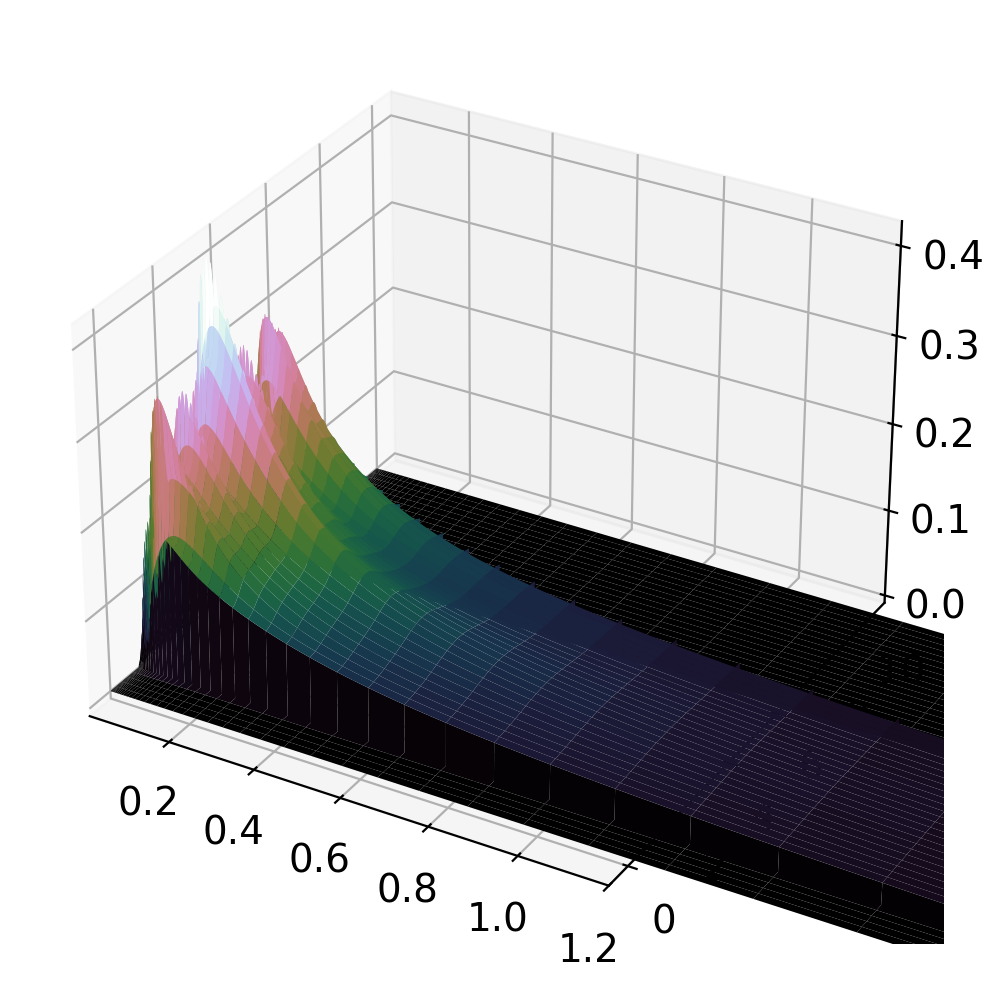

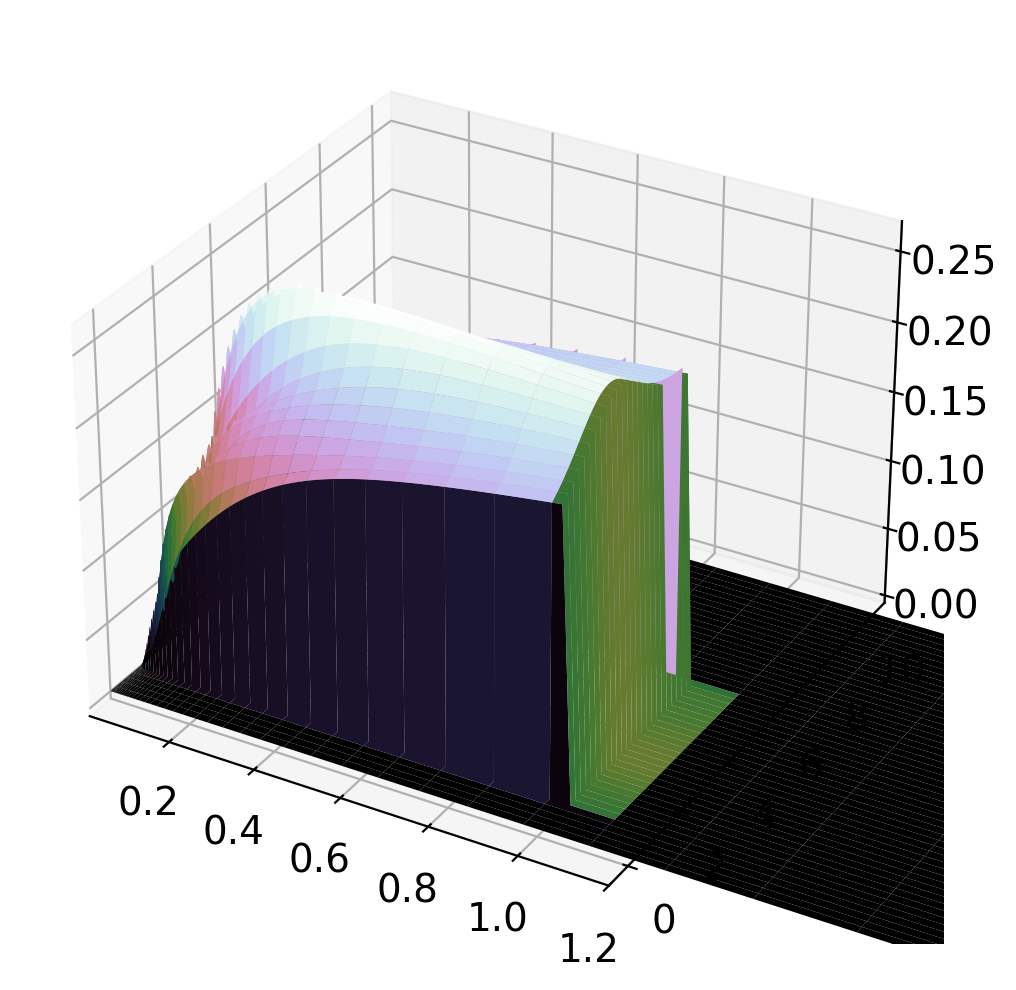

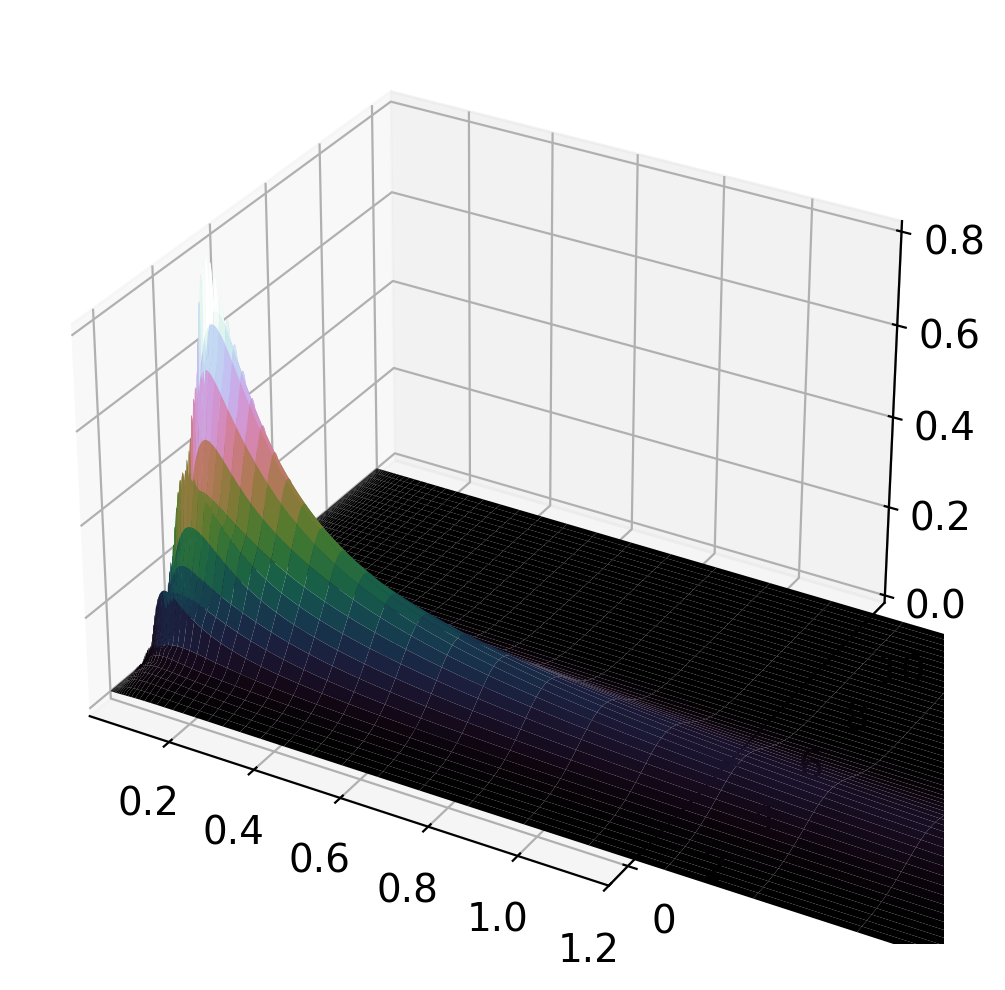

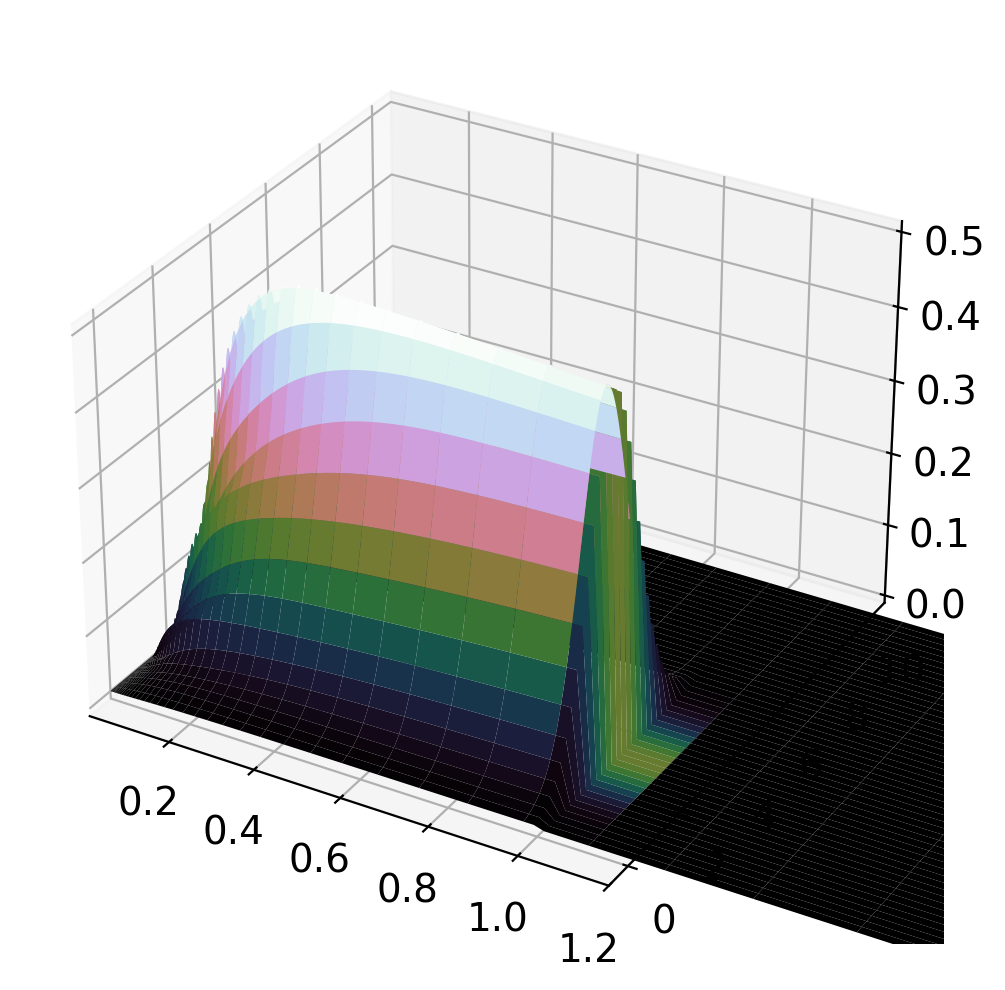

In [36]:
X,Y=np.meshgrid(sigma_to_test, x_val)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,np.exp(twoD_logPosterior_1), cmap='cubehelix', lw=0.)
ax.set_xlim(1e-2,1.2)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,np.exp(twoD_logPosterior_2), cmap='cubehelix', lw=0.)
ax.set_xlim(1e-2,1.2)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,np.exp(twoD_logPosterior_3), cmap='cubehelix', lw=0.)
ax.set_xlim(1e-2,1.2)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,np.exp(twoD_logPosterior_4), cmap='cubehelix', lw=0.)
ax.set_xlim(1e-2,1.2)
plt.show()

In [37]:
print('Model 1 has evidence ', "%.4f" %np.exp(twoD_logevidence_1))
print('Model 2 has evidence ', "%.4f" %np.exp(twoD_logevidence_2))
print('Model 3 has evidence ', "%.4f" %np.exp(twoD_logevidence_3))
print('Model 4 has evidence ', "%.4f" %np.exp(twoD_logevidence_4))

print('\n')

print('Model 1 is preferred over model 2 by',\
      "%.4f" %np.exp(twoD_logevidence_1-twoD_logevidence_2))
print('Model 1 is preferred over model 3 by',\
      "%.4f" %np.exp(twoD_logevidence_1-twoD_logevidence_3))
print('Model 1 is preferred over model 4 by',\
      "%.4f" %np.exp(twoD_logevidence_1-twoD_logevidence_4))
print('Model 2 is preferred over model 1 by',\
      "%.4f" %np.exp(twoD_logevidence_2-twoD_logevidence_1))
print('Model 2 is preferred over model 3 by',\
      "%.4f" %np.exp(twoD_logevidence_2-twoD_logevidence_3))
print('Model 2 is preferred over model 4 by',\
      "%.4f" %np.exp(twoD_logevidence_2-twoD_logevidence_4))
print('Model 3 is preferred over model 1 by',\
      "%.4f" %np.exp(twoD_logevidence_3-twoD_logevidence_1))
print('Model 3 is preferred over model 2 by',\
      "%.4f" %np.exp(twoD_logevidence_3-twoD_logevidence_2))
print('Model 3 is preferred over model 4 by',\
      "%.4f" %np.exp(twoD_logevidence_3-twoD_logevidence_4))
print('Model 4 is preferred over model 1 by',\
      "%.4f" %np.exp(twoD_logevidence_4-twoD_logevidence_1))
print('Model 4 is preferred over model 2 by',\
      "%.4f" %np.exp(twoD_logevidence_4-twoD_logevidence_2))
print('Model 4 is preferred over model 3 by',\
      "%.4f" %np.exp(twoD_logevidence_4-twoD_logevidence_3))

Model 1 has evidence  0.0040
Model 2 has evidence  0.0051
Model 3 has evidence  0.0041
Model 4 has evidence  0.0054


Model 1 is preferred over model 2 by 0.7855
Model 1 is preferred over model 3 by 0.9687
Model 1 is preferred over model 4 by 0.7469
Model 2 is preferred over model 1 by 1.2730
Model 2 is preferred over model 3 by 1.2332
Model 2 is preferred over model 4 by 0.9508
Model 3 is preferred over model 1 by 1.0323
Model 3 is preferred over model 2 by 0.8109
Model 3 is preferred over model 4 by 0.7710
Model 4 is preferred over model 1 by 1.3389
Model 4 is preferred over model 2 by 1.0518
Model 4 is preferred over model 3 by 1.2970


In [38]:
max_index1 = np.unravel_index(np.argmax(twoD_logPosterior_1), twoD_logPosterior_1.shape)
max_index2 = np.unravel_index(np.argmax(twoD_logPosterior_2), twoD_logPosterior_2.shape)
max_index3 = np.unravel_index(np.argmax(twoD_logPosterior_3), twoD_logPosterior_3.shape)
max_index4 = np.unravel_index(np.argmax(twoD_logPosterior_4), twoD_logPosterior_3.shape)

print('Model 1 peaks at(mean ', "%.4f" %x_val[max_index1[0]],\
      ' and sigma ', "%.4f" %sigma_to_test[max_index1[1]])
print('Model 2 peaks at(mean ', "%.4f" %x_val[max_index2[0]],\
      ' and sigma ', "%.4f" %sigma_to_test[max_index2[1]])
print('Model 3 peaks at(mean ', "%.4f" %x_val[max_index3[0]],\
      ' and sigma ', "%.4f" %sigma_to_test[max_index3[1]])
print('Model 4 peaks at(mean ', "%.4f" %x_val[max_index4[0]],\
      ' and sigma ', "%.4f" %sigma_to_test[max_index4[1]])
print('The truth has mean ',\
      "%.4f" %mu_true,  ' and sigma ', "%.4f" %sigma_true)

Model 1 peaks at(mean  3.1031  and sigma  0.0592
Model 2 peaks at(mean  3.0631  and sigma  0.3591
Model 3 peaks at(mean  3.1031  and sigma  0.0592
Model 4 peaks at(mean  3.0430  and sigma  0.3675
The truth has mean  3.1416  and sigma  0.3000


In principle, this is easily extendable to signal models with more parameters (in this case also test for the best matching amplitude) but the current grid model isn't very computationally efficient with increased dimensionality. Tomorrow you'll learn about methods which has a much slower dimensional scaling, and which are therefore more suitable for high-dimensional problems

## Exercises

 * 1 Repeat the 1D noisy-data test with a fixed $\mu$, but varying $\sigma$ 
 
 * 2 The current measures of $\mu$ and $\sigma$ appear to vary quite a lot based on the choice of priors, find a threshold signal to noise level (either by varying the signal amplitude or $\sigma_{noise}$) where this is no longer the case
 
 * 3 Are there other choices of models, either in the likelihood function or the prior distribution, which can give stronger inference on $\mu$ and/or $\sigma$ for a given (not too high) signal to noise ratio?

 * 4a Find other statistical tests which can show the differences and similarities between the datasaurus datasets
 * 4b Generalise the tests to two dimensions
 
 * 5 Compute the KL-divergence for the 2D noisy Gaussian models

